In [2]:
# End to End Machine Learning Project
"""
1 Look at the big picture.[Frame the problem, Select the Performance Measure] 2 Get the data. 3 Discover and visualize the data to gain insights.
4 Prepare data for machine learnig algo. 5 Select a model and train it. 6 Fine-tune your model.
7 Present your solution. 8 Laucnh, monitor, and mainitain your system.
"""


'\n1 Look at the big picture.[Frame the problem, Select the Performance Measure] 2 Get the data. 3 Discover and visualize the data to gain insights.\n4 Prepare data for machine learnig algo. 5 Select a model and train it. 6 Fine-tune your model.\n7 Present your solution. 8 Laucnh, monitor, and mainitain your system.\n'

In [3]:
import os, tarfile, urllib 

In [4]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"

In [5]:
HOUSING_PATH = os.path.join("datasets", "housing")

In [6]:
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [7]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

In [8]:
fetch_housing_data(HOUSING_URL, HOUSING_PATH)

In [9]:
import pandas as pd

In [10]:
def load_housing_data(housing_path = HOUSING_PATH):
    cvs_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(cvs_path)

In [11]:
housing = load_housing_data()

In [12]:
# relives first 5 instances in data as preview

housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
#info method is used to get quick description of the data:
#The number of rows, attribute's type, num of nonnull values

housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
"""
Find out what categories exist and how many districs belong
to each category by using the value_counts method

"""

housing['ocean_proximity'].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
# Hows a summary of the numerical attributes.

housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

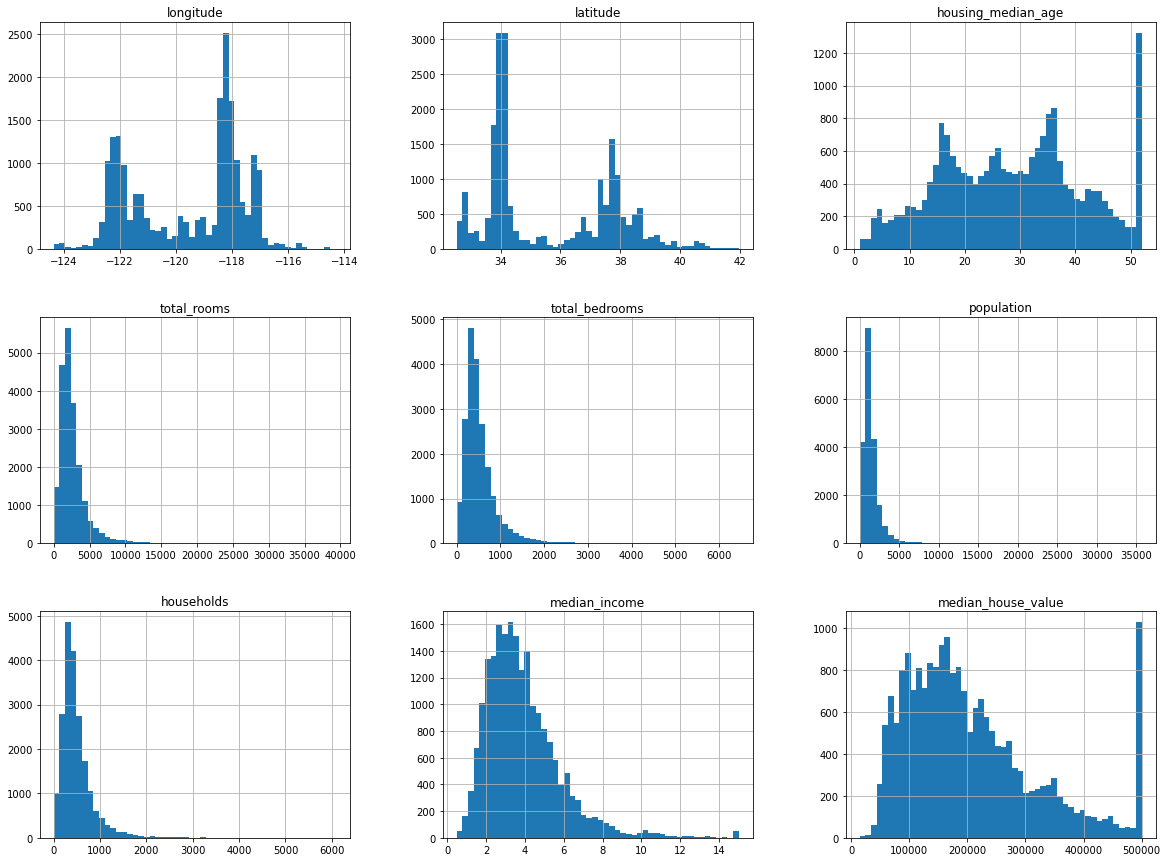

In [16]:
"""
A Histogram shows the number of insrances (on the vertical axis)
that have a given value range(on the horizontal axis)
"""

%matplotlib inline 

import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))

In [17]:
# Create a Test Set 

import numpy as np
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=14)

In [18]:
"""
The following code users the pd.cut() funtion
to create an income category attribute with five categories
"""

'\nThe following code users the pd.cut() funtion\nto create an income category attribute with five categories\n'

In [19]:
housing['income_cat'] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels = [1, 2, 3, 4, 5])

<AxesSubplot:>

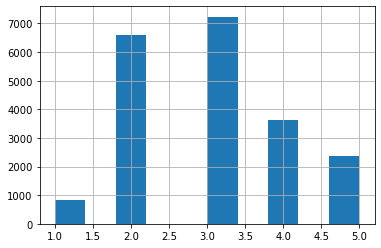

In [20]:
housing['income_cat'].hist()

In [21]:
"""
Now we are ready to do stratified sampling based on the income category
In stratified sampling the values are divided into homogenenous subgroups called strata,
and the right number of instances are sampled from each stratum
to guarantee that the test set is representative of the overall popolation.
"""

'\nNow we are ready to do stratified sampling based on the income category\nIn stratified sampling the values are divided into homogenenous subgroups called strata,\nand the right number of instances are sampled from each stratum\nto guarantee that the test set is representative of the overall popolation.\n'

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=14)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [23]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [24]:
# Remove income_cat attribute so the data is back to its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [25]:

# Discover and Visualize the Data to Gain Insights.
# create a copy to avoid hicups

housing = strat_train_set.copy()


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

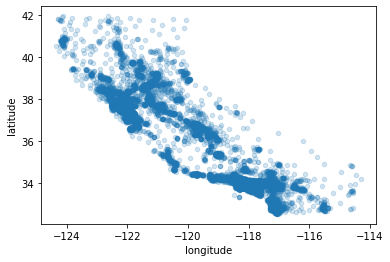

In [28]:
# Visualizing Geographical Data

housing.plot(kind='scatter', x='longitude', y='latitude', alpha =0.2)

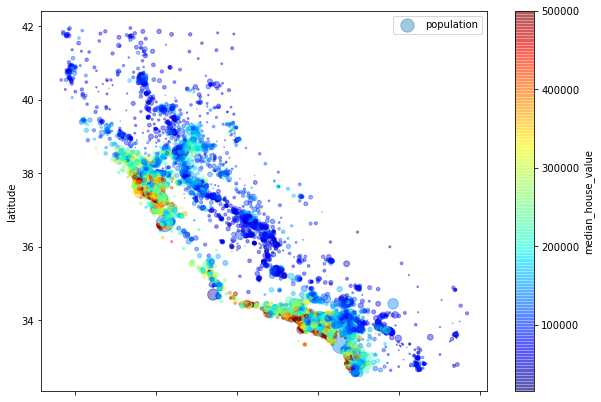

In [32]:
"""
Looking at housing prices.

The radius of each circle represents the district's population (option s) 
The color represents the price (option c)
Jets ranges from blue (low val) to red (high price)
"""


housing.plot(kind='scatter', x = 'longitude', y = 'latitude', alpha=0.4,
            s=housing['population'] / 100, label='population', figsize=(10,7),
            c='median_house_value', cmap = plt.get_cmap('jet'), colorbar=True,
)
plt.legend()

In [33]:
""" 
Looking for Correlations.
If dataset is not too large, compute standard correlation coefficient between every pair of attributes
"""

corr_matrix = housing.corr()


In [35]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686922
total_rooms           0.134830
housing_median_age    0.101327
households            0.067111
total_bedrooms        0.050289
population           -0.022197
longitude            -0.043755
latitude             -0.146982
Name: median_house_value, dtype: float64